In [2]:
import nx as nx
import pandas as pd

df_classes = pd.read_csv("data/elliptic_txs_classes.csv")
df_edgelist = pd.read_csv('data/elliptic_txs_edgelist.csv')
df_features = pd.read_csv('data/elliptic_txs_features.csv', header=None)

In [3]:
df_classes.head()


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [4]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, 0 to 166
dtypes: float64(165), int64(2)
memory usage: 259.6 MB


In [5]:
df_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [98]:
df_features.head()

,transactionId,time_step,local_feat_1,local_feat_2,local_feat_3,local_feat_4,local_feat_5,local_feat_6,local_feat_7,local_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,agg_feat_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [99]:
df_features.describe()

,transactionId,time_step,local_feat_1,local_feat_2,local_feat_3,local_feat_4,local_feat_5,local_feat_6,local_feat_7,local_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,agg_feat_72
count,2.037690e+05,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,1.711310e+08,23.843961,2.454849e-17,-7.531922e-18,2.231681e-17,6.241732e-17,7.653968e-17,5.858162e-17,3.068561e-17,3.570689e-17,...,-2.956977e-17,1.673761e-16,-7.225066e-17,7.476130e-17,-4.658634e-17,2.231681e-18,5.244450e-17,1.562177e-17,4.072817e-17,5.913954e-17
std,1.104655e+08,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361e+00,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-5.770994e-01,-6.262286e-01,-9.790738e-01,-9.785560e-01,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433452e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-5.696264e-01,-5.946915e-01,-9.790738e-01,-9.785560e-01,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624375e+08,23.000000,-1.692045e-01,-1.328975e-01,4.636092e-01,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-4.799511e-01,-4.559278e-01,2.411283e-01,2.414064e-01,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318553e-01,-5.524241e-02,1.018602e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355932e-01,...,1.552495e-01,1.212026e-01,1.305594e+00,1.398764e+00,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520067e-01,1.199710e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580e+00,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953e+00,7.914041e+00,1.461330e+00,1.461369e+00,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [7]:
def rename_features(df_features):
    df_features.columns =["transactionId","time_step"]+[f"local_feat_{i}" for i in range(1,94)] + [f"agg_feat_{i}" for i in range(1,73)]
    return df_features

In [8]:
df_features = rename_features(df_features)
df_features.head()

,transactionId,time_step,local_feat_1,local_feat_2,local_feat_3,local_feat_4,local_feat_5,local_feat_6,local_feat_7,local_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,agg_feat_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [9]:
df_classes.head()



,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [10]:
def rename_classes(df_classes):
    df_classes.replace({'class':{'1':1,'2':0,'unknown':2}},inplace=True)
    return df_classes

df_classes = rename_classes(df_classes)
df_classes.head()

,txId,class
0,230425980,2
1,5530458,2
2,232022460,2
3,232438397,0
4,230460314,2


In [11]:
def combine_dataframes(df_classes, df_features):
    df_combined = pd.merge(df_features, df_classes, left_on='transactionId', right_on='txId', how='left')
    df_combined.drop(columns=['txId'], inplace=True)
    return df_combined

In [12]:
df_combined = combine_dataframes(df_classes, df_features)
df_combined.head()

,transactionId,time_step,local_feat_1,local_feat_2,local_feat_3,local_feat_4,local_feat_5,local_feat_6,local_feat_7,local_feat_8,...,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,agg_feat_72,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,2


In [33]:
def combine_dataframes(df_classes, df_features, only_labeled=True):
    df_combined = pd.merge(df_features, df_classes, left_on='id', right_on='txId', how='left')
    if only_labeled == True:
        df_combined = df_combined[df_combined['class'] != 2].reset_index(drop=True)
    df_combined.drop(columns=['txId'], inplace=True)
    return df_combined


(46564, 168)

In [14]:
def import_elliptic_edgelist(df_edgelist, df_features):
    df_edges = df_edgelist.merge(df_features[['transactionId', 'time_step']], left_on='txId1', right_on='transactionId')
    return df_edges
df_edges = import_elliptic_edgelist(df_edgelist, df_features)
df_edges.head()


,txId1,txId2,transactionId,time_step
0,230425980,5530458,230425980,1
1,232022460,232438397,232022460,1
2,232022460,232022462,232022460,1
3,230460314,230459870,230460314,1
4,230460314,230460307,230460314,1


## Exploratory Data Analysis

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams.update({'font.size': 15})

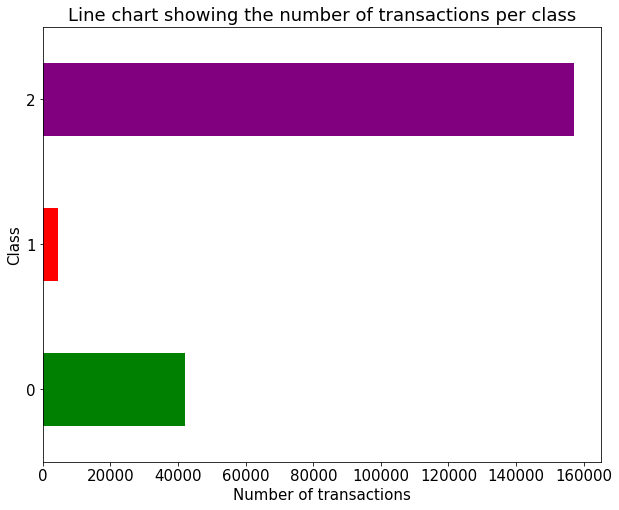

In [136]:
plt.figure(figsize=(10, 8))
df_combined["class"].value_counts().sort_index().plot.barh(color = ['green','red','purple'])
plt.title("Line chart showing the number of transactions per class")
plt.xlabel("Number of transactions")
plt.ylabel("Class")
plt.savefig('trans_per_class.png')
plt.show()

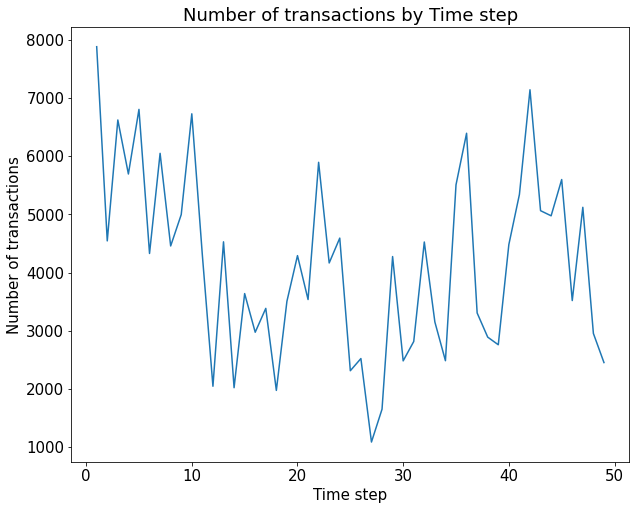

In [126]:
plt.figure(figsize=(10, 8))
df_combined["time_step"].value_counts().sort_index().plot.line()
plt.title('Number of transactions by Time step')
plt.xlabel("Time step")
plt.ylabel("Number of transactions")
plt.savefig('trans_per_timestep.png')
plt.show()

In [127]:
groupedByClasses  = df_combined.groupby(['time_step', 'class']).count()
groupedByClasses = groupedByClasses['transactionId'].reset_index().rename(columns={'transactionId': 'count'})
groupedByClasses.head()


,time_step,class,count
0,1,0,2130
1,1,1,17
2,1,2,5733
3,2,0,1099
4,2,1,18


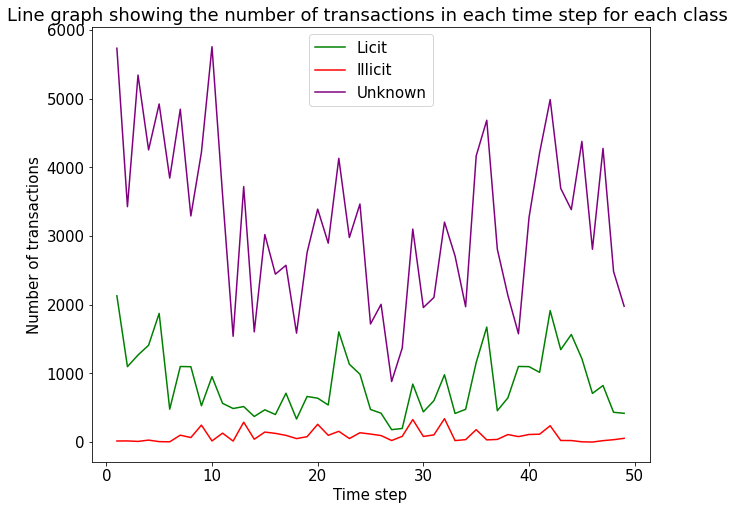

In [140]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='time_step', y='count', hue='class', data = groupedByClasses, palette=['green', 'red', 'purple'] )
plt.title("Line graph showing the number of transactions in each time step for each class ")
plt.xlabel("Time step")
plt.ylabel("Number of transactions")
plt.legend(["Licit","Illicit","Unknown"])
plt.savefig('trans_per_timestep_per_class.png')
plt.show()

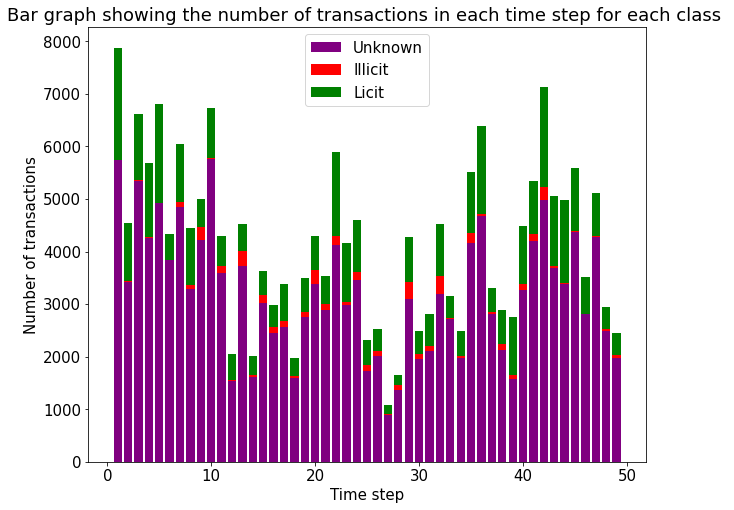

In [141]:
plt.figure(figsize=(10, 8))
class0 = groupedByClasses[groupedByClasses['class'] == 0]
class1 = groupedByClasses[groupedByClasses['class'] == 1]
class2 = groupedByClasses[groupedByClasses['class'] == 2]

p1 = plt.bar(class2['time_step'], class2['count'], color = 'purple')
p2 = plt.bar(class1['time_step'], class1['count'], color='red',
             bottom=class2['count'])
p3 = plt.bar(class0['time_step'], class0['count'], color='green',
             bottom=np.array(class2['count'])+np.array(class1['count']))
plt.legend(["Unknown","Illicit","Licit"])
plt.xlabel("Time step")
plt.ylabel("Number of transactions")
plt.title("Bar graph showing the number of transactions in each time step for each class ")
plt.savefig('bargraph_trans_per_timestep_per_class.png')
plt.show()

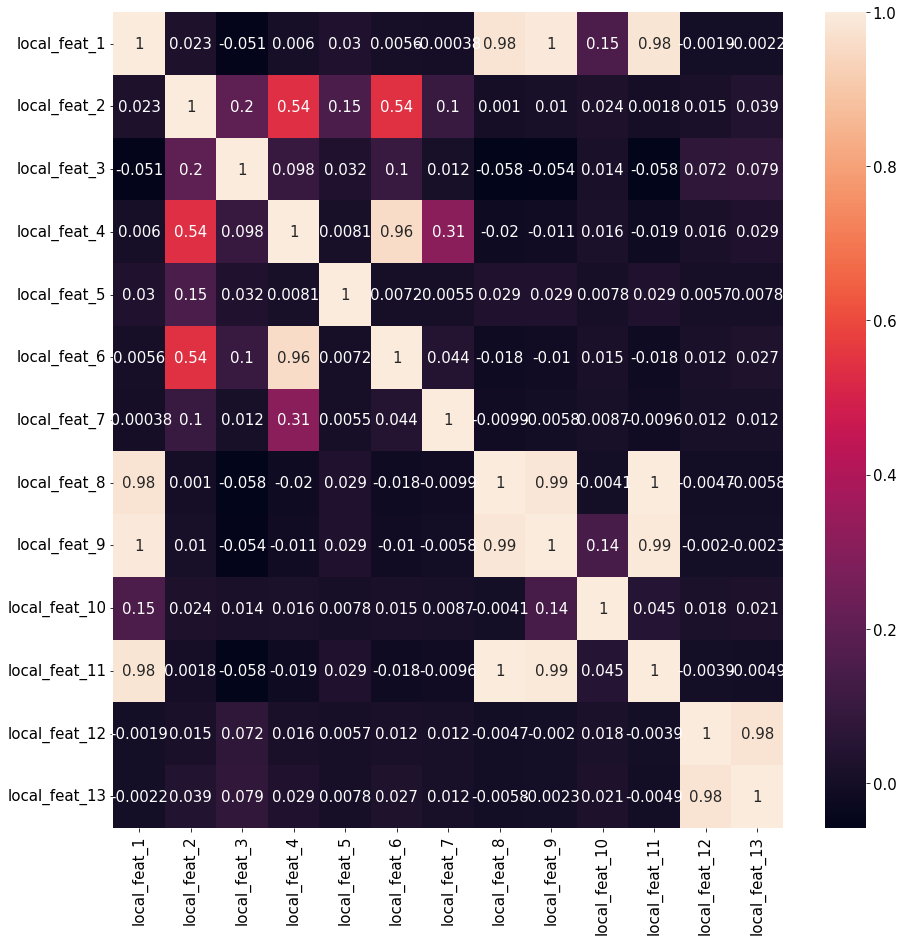

In [143]:
plt.figure(figsize=(15, 15))
#df_combined.drop(columns=['transactionId','time_step', 'class'], inplace=True)
df_features_only = df_combined.iloc[:,2:15]
#df_features_only =  df_combined
sns.heatmap(df_features_only.corr(),annot=True)


plt.show()

In [66]:
c1 = df_combined.corr().unstack().sort_values(ascending = False).drop_duplicates()
c1.head(50)

transactionId  transactionId    1.000000
local_feat_30  local_feat_24    1.000000
local_feat_29  local_feat_23    1.000000
local_feat_31  local_feat_25    1.000000
local_feat_22  local_feat_28    1.000000
local_feat_65  local_feat_59    1.000000
local_feat_67  local_feat_61    1.000000
local_feat_60  local_feat_66    1.000000
local_feat_64  local_feat_58    0.999997
local_feat_32  local_feat_26    0.999589
local_feat_27  local_feat_33    0.999573
agg_feat_60    agg_feat_59      0.999418
local_feat_11  local_feat_8     0.998702
agg_feat_8     agg_feat_10      0.998631
agg_feat_65    agg_feat_66      0.997194
local_feat_92  local_feat_93    0.997029
agg_feat_54    agg_feat_53      0.996897
agg_feat_23    agg_feat_24      0.996811
local_feat_74  local_feat_75    0.996794
local_feat_80  local_feat_81    0.996519
local_feat_87  local_feat_86    0.996482
agg_feat_72    agg_feat_71      0.996221
local_feat_17  local_feat_1     0.996121
agg_feat_42    agg_feat_41      0.996116
agg_feat_47    a

In [289]:
c1.tail(40)

transactionId  agg_feat_46     -0.235761
               agg_feat_10     -0.236483
agg_feat_8     transactionId   -0.237162
agg_feat_19    agg_feat_21     -0.238023
time_step      transactionId   -0.238670
agg_feat_55    local_feat_89   -0.238955
class          local_feat_89   -0.239326
local_feat_29  class           -0.245719
local_feat_23  class           -0.245729
class          local_feat_31   -0.246097
local_feat_25  class           -0.246101
local_feat_21  local_feat_92   -0.246358
local_feat_92  local_feat_20   -0.248169
local_feat_21  local_feat_93   -0.249002
local_feat_20  local_feat_93   -0.251213
agg_feat_21    class           -0.252575
class          local_feat_67   -0.264962
local_feat_61  class           -0.264970
agg_feat_44    transactionId   -0.271313
local_feat_66  class           -0.272453
local_feat_60  class           -0.272470
class          local_feat_65   -0.290752
               local_feat_59   -0.290770
               local_feat_52   -0.314174
agg_feat_47    l

In [297]:
c2 = c1[c1>0.96]
c2

transactionId  transactionId    1.000000
local_feat_30  local_feat_24    1.000000
local_feat_29  local_feat_23    1.000000
local_feat_31  local_feat_25    1.000000
local_feat_22  local_feat_28    1.000000
                                  ...   
local_feat_60  local_feat_65    0.965202
local_feat_66  local_feat_65    0.965192
local_feat_60  local_feat_59    0.965160
local_feat_59  local_feat_66    0.965150
local_feat_51  local_feat_45    0.964826
Length: 92, dtype: float64

In [265]:
c1 = pd.DataFrame(c1,columns=["fFeature 1","Feature 2","Correlation"])

ValueError: Shape of passed values is (14029, 1), indices imply (14029, 3)

Text(0, 0.5, 'Y axis title')

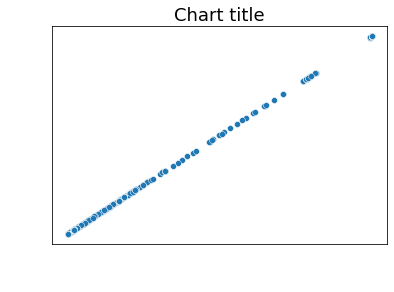

In [69]:
#Creating the scatter plot
sns.scatterplot(data=df_combined, x="local_feat_30", y="local_feat_24")
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

Text(0, 0.5, 'agg_feat_11')

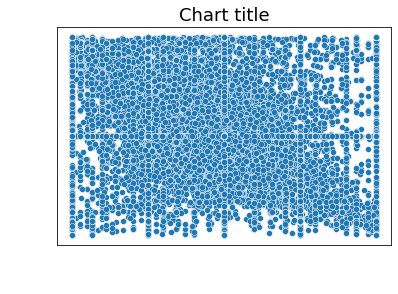

In [70]:
#Creating the scatter plot
sns.scatterplot(data=df_combined, x="local_feat_57", y="agg_feat_11")
plt.title('Chart title')
plt.xlabel('"local_feat_57"')
plt.ylabel("agg_feat_11")


Text(0, 0.5, 'agg_feat_11')

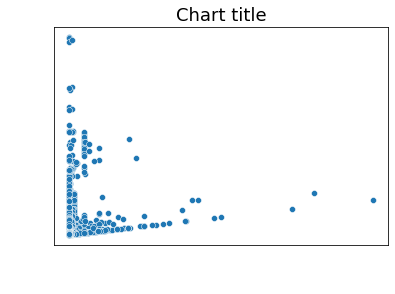

In [71]:
#Creating the scatter plot
sns.scatterplot(data=df_combined, x="local_feat_16", y="local_feat_17")
plt.title('Chart title')

plt.xlabel('"local_feat_57"')
plt.ylabel("agg_feat_11")

Text(0, 0.5, 'agg_feat_11')

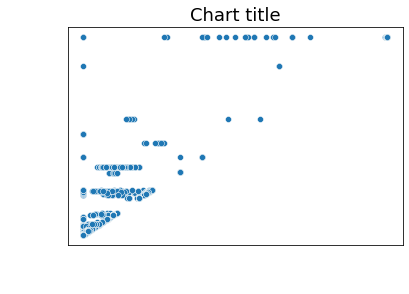

In [72]:
#Creating the scatter plot
sns.scatterplot(data=df_combined, x="local_feat_60", y="local_feat_59")
plt.title('Chart title')

plt.xlabel('"local_feat_57"')
plt.ylabel("agg_feat_11")

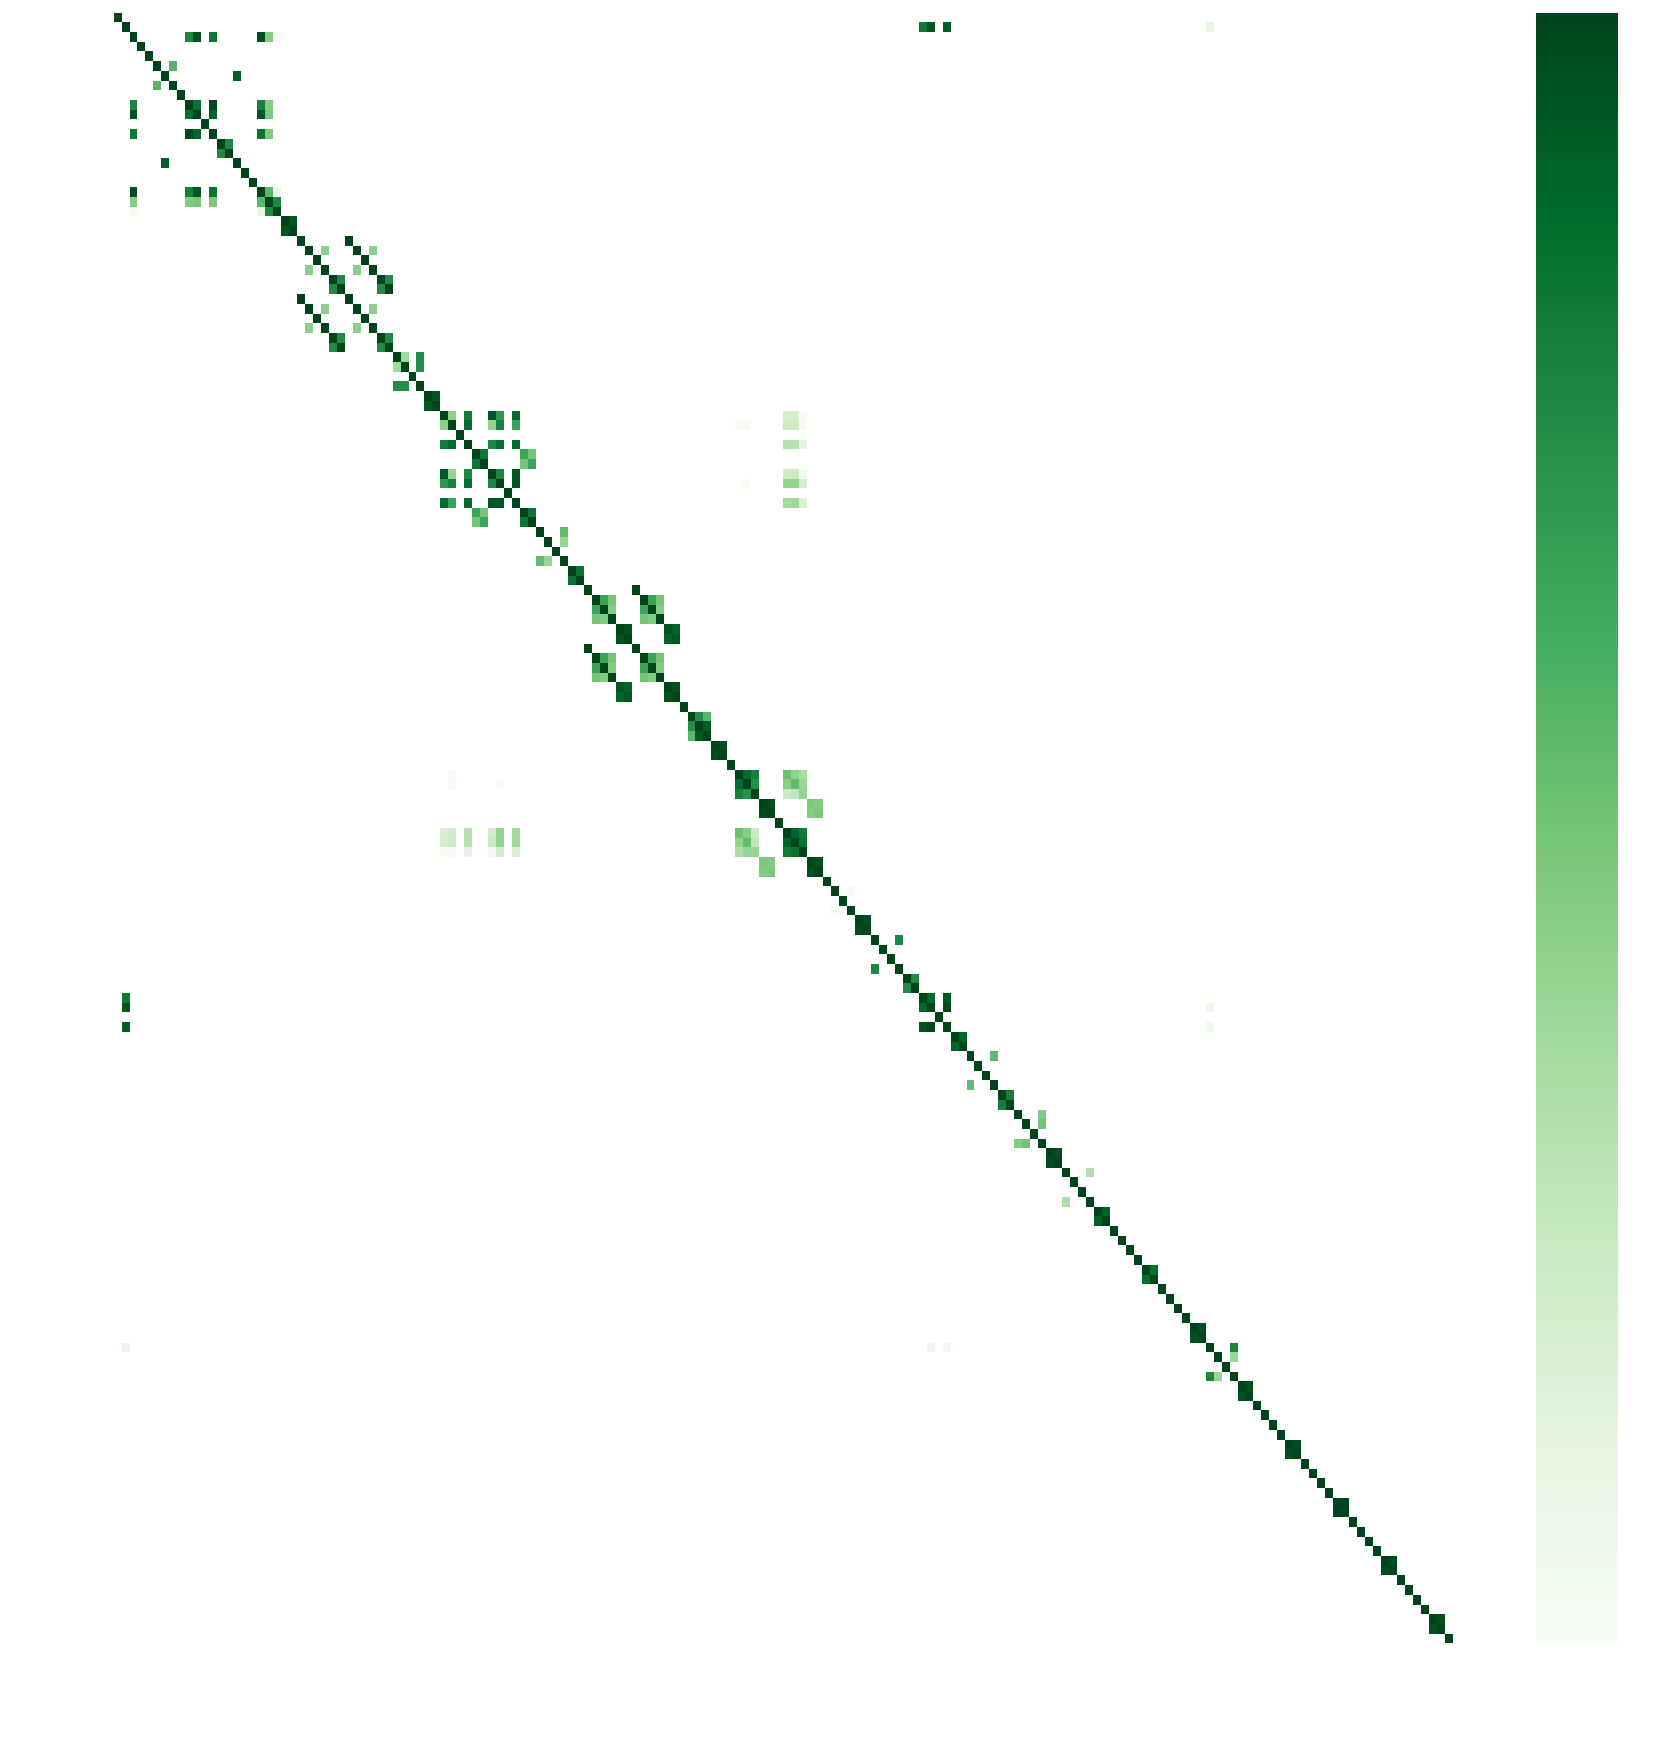

In [73]:
dfCorr = df_combined.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9))]
plt.figure(figsize=(30,30))
sns.heatmap(filteredDf, cmap="Greens")
plt.show()

In [74]:
bad_ids = df_combined.loc[(df_combined['time_step'] == 37) & (df_combined['class'] == 1), 'transactionId']
short_edges = df_edgelist.loc[df_edgelist['txId1'].isin(bad_ids)]

In [75]:
import networkx as nx



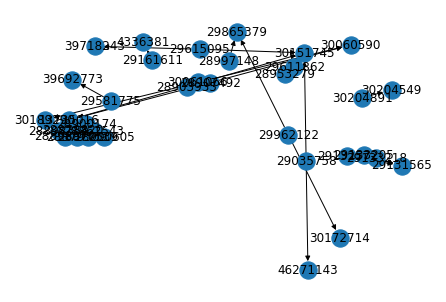

In [76]:
graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2',
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)



In [77]:
df_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [149]:

df_edges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234355 entries, 0 to 234354
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   txId1          234355 non-null  int64
 1   txId2          234355 non-null  int64
 2   transactionId  234355 non-null  int64
 3   time_step      234355 non-null  int64
dtypes: int64(4)
memory usage: 8.9 MB


In [78]:
df_edges = df_edges.rename(columns={'transactionId':'txId'})

In [154]:
df_classes.head()

,txId,class
0,230425980,2
1,5530458,2
2,232022460,2
3,232438397,0
4,230460314,2


In [309]:
df_merged.head()

,txId,class,txId1,txId2,time_step
0,232438397,0,232438397,92491280,1
1,232029206,0,232029206,5119722,1
2,232344069,0,232344069,27553029,1
3,232344069,0,232344069,234419685,1
4,27553029,0,27553029,230411688,1


In [79]:
df_merged = pd.merge(df_classes,df_edges)
df_merged.head()

,txId,class,txId1,txId2,time_step
0,230425980,2,230425980,5530458,1
1,5530458,2,5530458,232403360,1
2,232022460,2,232022460,232438397,1
3,232022460,2,232022460,232022462,1
4,232438397,0,232438397,92491280,1


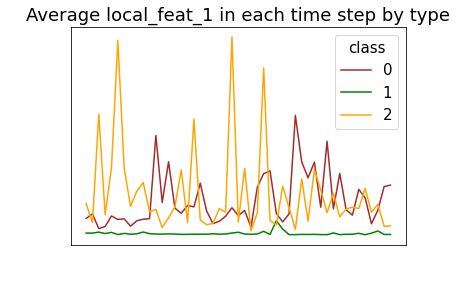

In [80]:
grouped = df_combined.groupby(['time_step', 'class'])['local_feat_1'].mean().reset_index()
sns.lineplot(x='time_step', y='local_feat_1', hue='class', data=grouped,palette=['brown', 'green', 'orange'] );
plt.title('Average local_feat_1 in each time step by type');

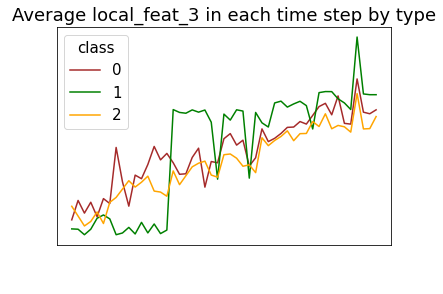

In [81]:
grouped1 = df_combined.groupby(['time_step', 'class'])['local_feat_3'].mean().reset_index()
sns.lineplot(x='time_step', y='local_feat_3', hue='class', data=grouped1,palette=['brown', 'green', 'orange'] );
plt.title('Average local_feat_3 in each time step by type');



In [223]:
df_merged.head()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53198 entries, 0 to 53197
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   txId       53198 non-null  int64 
 1   class      53198 non-null  int64 
 2   txId1      53198 non-null  int64 
 3   txId2      53198 non-null  int64 
 4   time_step  53198 non-null  int64 
 5   colour     53198 non-null  object
dtypes: int64(5), object(1)
memory usage: 2.4+ MB


In [184]:
df_merged["colour"] = "red"
mask = df_merged["class"] == 1
df_merged.loc[mask,"colour"] = "green"


In [82]:
df_merged = df_merged[df_merged['class'] != 2].reset_index(drop=True)


In [83]:
licitClass = df_merged[df_merged['class'] == 0]["txId"].values
licitClass2 = df_merged[(df_merged['class'] == 0)]["txId2"].values
illicitClass = df_merged[ (df_merged['class'] == 1)]["txId"].values
illicitClass2 = df_merged[(df_merged['class'] == 1)]["txId2"].values


In [316]:
vals = df_merged[df_merged['class'] == 0]["txId"].values
vals

array([232438397, 232029206, 232344069, ...,  80329479, 158406298,
       147478192])

In [363]:
df_merged[(df_merged['time_step'] == 37) & (df_merged['txId2'] == 28833904)]

,txId,class,txId1,txId2,time_step
36451,1360579,0,1360579,28833904,37


licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
illicit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
illicit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
illicit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
illicit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
illicit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit
licit


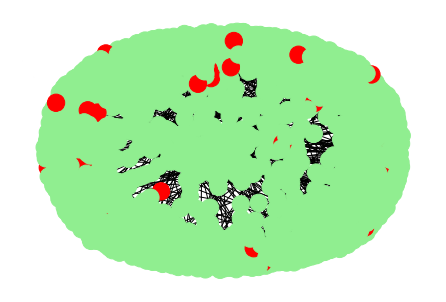

In [84]:
bad_ids = df_combined.loc[(df_combined['time_step'] == 37), 'transactionId']
#short_edges = df_merged[df_merged['time_step'] == 29]
#short_edges = df_merged.loc[df_merged['txId1'].isin(bad_ids)]
short_edges = df_merged[df_merged['time_step'] == 43]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2',
                                create_using = nx.DiGraph())
colours =[]
for node in graph:
    if (node in illicitClass) | (node in illicitClass2) :
        print("illicit")
        colours.append("red")
    elif (node in licitClass)  | (node in licitClass2):
               print("licit")
               colours.append("lightgreen")
    else:
        print("unknown")
        colours.append("blue")

pos = nx.spring_layout(graph)
nx.draw(graph,pos=pos,node_color=colours)

In [346]:
df_merged[df_merged['class'] == 2]

,txId,class,txId1,txId2,time_step


In [341]:
nodes = []
for node in graph:
   nodes.append(node)
len(nodes)

533

## Relationship between features and y-variable

In [101]:
df_features.describe()

,transactionId,time_step,local_feat_1,local_feat_2,local_feat_3,local_feat_4,local_feat_5,local_feat_6,local_feat_7,local_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,agg_feat_72
count,2.037690e+05,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,1.711310e+08,23.843961,2.454849e-17,-7.531922e-18,2.231681e-17,6.241732e-17,7.653968e-17,5.858162e-17,3.068561e-17,3.570689e-17,...,-2.956977e-17,1.673761e-16,-7.225066e-17,7.476130e-17,-4.658634e-17,2.231681e-18,5.244450e-17,1.562177e-17,4.072817e-17,5.913954e-17
std,1.104655e+08,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361e+00,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-5.770994e-01,-6.262286e-01,-9.790738e-01,-9.785560e-01,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433452e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-5.696264e-01,-5.946915e-01,-9.790738e-01,-9.785560e-01,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624375e+08,23.000000,-1.692045e-01,-1.328975e-01,4.636092e-01,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-4.799511e-01,-4.559278e-01,2.411283e-01,2.414064e-01,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318553e-01,-5.524241e-02,1.018602e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355932e-01,...,1.552495e-01,1.212026e-01,1.305594e+00,1.398764e+00,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520067e-01,1.199710e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580e+00,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953e+00,7.914041e+00,1.461330e+00,1.461369e+00,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [ ]:
df_combined.head()

(-0.18, 0.0)

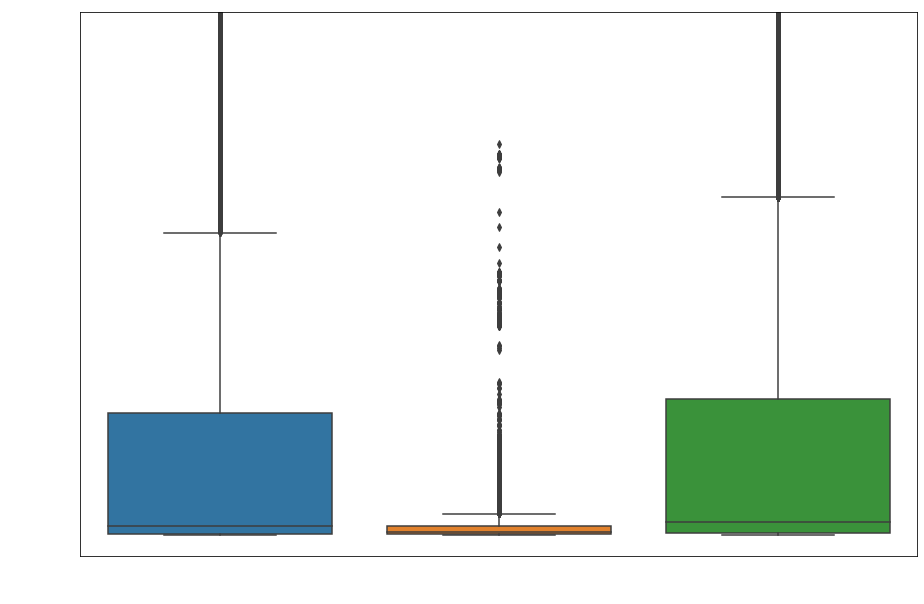

In [109]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(x="class", y='local_feat_1', data=df_combined)
ax.set_ylim(-0.18,0)

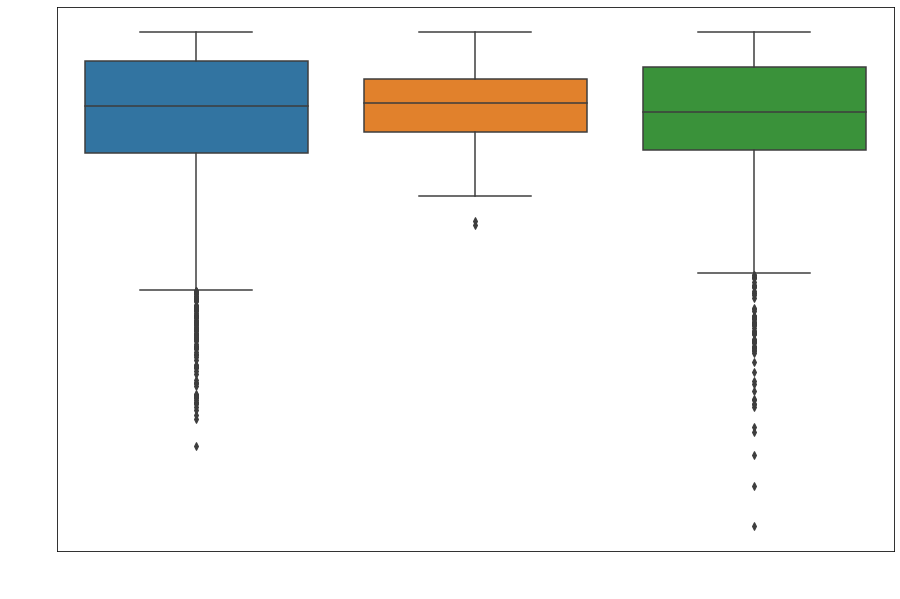

In [114]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(x="class", y='agg_feat_7', data=df_combined)
#ax.se
# _ylim(-0.1,0.5)

In [122]:
float('3')

3.0